<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод:</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from collections import Counter
from sklearn.metrics.scorer import make_scorer
from sklearn.dummy import DummyRegressor

In [2]:
data_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
data_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
data_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')

Давайте посмотрим какие данные у нас есть и что мы с ними сможем сделать

In [3]:
data_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
data_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [5]:
data_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
date                                                  14149 non-null object
final.output.concentrate_ag                           14148 non-null float64
final.output.concentrate_pb                           14148 non-null float64
final.output.concentrate_sol                          13938 non-null float64
final.output.concentrate_au                           14149 non-null float64
final.output.recovery                                 14149 non-null float64
final.output.tail_ag                                  14149 non-null float64
final.output.tail_pb                                  14049 non-null float64
final.output.tail_sol                                 14144 non-null float64
final.output.tail_au                                  14149 non-null float64
primary_cleaner.input.sulfate                         14129 non-null float64
primary_cleaner.input.depressant             

In [7]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
date                                          5290 non-null object
primary_cleaner.input.sulfate                 5286 non-null float64
primary_cleaner.input.depressant              5285 non-null float64
primary_cleaner.input.feed_size               5290 non-null float64
primary_cleaner.input.xanthate                5286 non-null float64
primary_cleaner.state.floatbank8_a_air        5290 non-null float64
primary_cleaner.state.floatbank8_a_level      5290 non-null float64
primary_cleaner.state.floatbank8_b_air        5290 non-null float64
primary_cleaner.state.floatbank8_b_level      5290 non-null float64
primary_cleaner.state.floatbank8_c_air        5290 non-null float64
primary_cleaner.state.floatbank8_c_level      5290 non-null float64
primary_cleaner.state.floatbank8_d_air        5290 non-null float64
primary_cleaner.state.floatbank8_d_level      5290 non-null float64
rougher.in

In [8]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
date                                                  19439 non-null object
final.output.concentrate_ag                           19438 non-null float64
final.output.concentrate_pb                           19438 non-null float64
final.output.concentrate_sol                          19228 non-null float64
final.output.concentrate_au                           19439 non-null float64
final.output.recovery                                 19439 non-null float64
final.output.tail_ag                                  19438 non-null float64
final.output.tail_pb                                  19338 non-null float64
final.output.tail_sol                                 19433 non-null float64
final.output.tail_au                                  19439 non-null float64
primary_cleaner.input.sulfate                         19415 non-null float64
primary_cleaner.input.depressant             

In [9]:
data_train.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,...,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14147.000000,14148.000000
mean,5.142034,10.132960,9.202849,44.003792,66.518832,9.607035,2.597298,10.512122,2.918421,133.320659,...,19.985454,-478.696836,15.487065,-460.229416,16.775136,-483.956022,13.064590,-483.966564,19.577539,-506.798480
std,1.369586,1.654930,2.790516,4.905261,10.295402,2.319069,0.971843,3.003617,0.903712,39.431659,...,5.657723,50.736021,5.255655,58.843586,5.831906,37.892788,5.765617,39.207913,5.764417,37.079249
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.709069,0.000000,-799.889113,-0.372054,-797.142475,0.646208,-800.006180,0.195324,-809.398668
25%,4.211620,9.297355,7.484645,43.276111,62.545817,7.997429,1.905973,8.811324,2.368607,107.006651,...,14.990775,-500.628656,11.894558,-500.149000,11.083980,-500.363177,8.994405,-500.105994,14.989304,-500.745104
50%,4.994652,10.297144,8.845462,44.872436,67.432775,9.480270,2.592022,10.514621,2.851025,133.018328,...,20.001789,-499.681450,14.975536,-499.388738,17.932223,-499.702452,11.997547,-499.914556,19.984175,-500.061431
75%,5.859540,11.170603,10.487508,46.166425,72.346428,11.003707,3.241723,11.933009,3.434764,159.825396,...,24.990826,-477.472413,20.059375,-400.039008,21.346550,-487.712108,17.982903,-453.186936,24.991623,-499.536466
max,16.001945,17.031899,18.124851,52.756638,100.000000,19.552149,5.639565,22.317730,8.197408,250.127834,...,30.115735,-245.239184,24.007913,-145.071088,43.709931,-275.073125,27.926001,-157.396071,32.188906,-104.427459


In [10]:
data_test.describe()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.000000,5285.000000,5290.000000,5286.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,...,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.839652,8.683596,7.266339,1.383803,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,...,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.027080,3.072050,0.610219,0.643474,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,...,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,...,1.079872e-16,-799.798523,2.489718e-17,-800.836914,0.069227,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,147.121401,6.489555,6.890000,0.907623,1.498936e+03,-500.357298,1.498971e+03,-500.703002,1.473230e+03,-501.018117,...,1.403618e+01,-500.868258,1.202862e+01,-500.323028,10.914838,-500.726841,8.036719,-500.194668,13.997317,-500.690984
50%,177.828489,8.052207,7.250000,1.197610,1.585129e+03,-499.969164,1.595622e+03,-500.028514,1.549595e+03,-500.017711,...,1.700847e+01,-500.115727,1.496486e+01,-499.576513,12.954182,-499.990332,10.004301,-499.990535,16.014935,-500.007126
75%,208.125438,10.027764,7.600000,1.797819,1.602077e+03,-499.568951,1.602324e+03,-499.293257,1.601144e+03,-498.994130,...,1.803862e+01,-499.404224,1.596213e+01,-400.933805,15.097528,-499.283191,11.997467,-499.719913,21.020013,-499.373018
max,265.983123,40.000000,15.500000,4.102454,2.103104e+03,-57.195404,1.813084e+03,-142.527229,1.715054e+03,-150.937035,...,3.005180e+01,-401.565212,3.126971e+01,-6.506986,25.258848,-244.483566,14.086866,-137.740004,26.705889,-123.307487


In [11]:
data_full.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,...,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19437.000000,19438.000000
mean,5.168470,9.978895,9.501224,44.076513,67.050208,9.688589,2.705795,10.583728,3.042467,144.624774,...,18.987674,-485.894516,15.010366,-461.078636,15.694452,-488.684065,12.198224,-487.149827,18.959024,-505.436305
std,1.372348,1.669240,2.787537,5.129784,10.125840,2.328642,0.949077,2.868782,0.922808,44.464071,...,5.411058,47.758570,4.890228,67.405524,5.510974,34.533396,5.333024,38.347312,5.550498,37.689057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.798523,0.000000,-800.836914,-0.372054,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,4.251240,9.137262,7.722820,43.402215,63.299712,8.062878,2.040119,8.938947,2.461138,114.107029,...,14.975734,-500.704892,11.940294,-500.187742,10.988606,-500.458467,8.971105,-500.129462,14.983037,-500.728067
50%,5.066094,10.102433,9.218961,45.011244,68.172738,9.743623,2.748730,10.622456,2.984909,143.232103,...,18.017481,-499.837793,14.971014,-499.459786,15.000036,-499.802605,11.019433,-499.935317,19.960541,-500.048400
75%,5.895527,11.035769,10.947813,46.275313,72.686642,11.134294,3.333216,12.104271,3.571351,175.075656,...,23.012470,-498.249730,19.034162,-400.118106,18.026190,-498.384187,14.019088,-499.436708,24.003170,-499.495378
max,16.001945,17.031899,19.615720,52.756638,100.000000,19.552149,5.804178,22.317730,8.245022,265.983123,...,30.115735,-245.239184,31.269706,-6.506986,43.709931,-244.483566,27.926001,-137.740004,32.188906,-104.427459


In [12]:
data_train['date'] = pd.to_datetime(data_train['date'], format = '%Y-%m-%dT%H:%M:%S')
data_test['date'] = pd.to_datetime(data_test['date'], format = '%Y-%m-%dT%H:%M:%S')
data_full['date'] = pd.to_datetime(data_full['date'], format = '%Y-%m-%dT%H:%M:%S')

После первого рассмотрения данных в глаза бросается что у нас есть большой скачек значений в первом квартиле, попробуем для начала проверить правильно ли рассчитана эффективность обогащения на обучающей выборке.

In [13]:
data_train['rougher.output.recovery_calculated'] = (data_train['rougher.output.concentrate_au'] *
    (data_train['rougher.input.feed_au'] - data_train['rougher.output.tail_au'])) * 100 / (data_train['rougher.input.feed_au'] *
    (data_train['rougher.output.concentrate_au'] - data_train['rougher.output.tail_au']))
comparision = ((Counter(data_train['rougher.output.recovery_calculated']) &
                Counter(data_train['rougher.output.recovery'])).elements())
comparision = pd.Series(comparision)
comparision.count()

5666

In [14]:
data_comparision = data_train[data_train['rougher.output.recovery_calculated'] != data_train['rougher.output.recovery']].loc[:, ['rougher.output.recovery_calculated', 'rougher.output.recovery', 'rougher.output.concentrate_au', 'rougher.input.feed_au', 'rougher.output.tail_au']]
data_comparision['delta_recovery'] = data_comparision['rougher.output.recovery_calculated'] - data_comparision['rougher.output.recovery']
data_comparision.sort_values(by = ['delta_recovery'], ascending = False)

,rougher.output.recovery_calculated,rougher.output.recovery,rougher.output.concentrate_au,rougher.input.feed_au,rougher.output.tail_au,delta_recovery
5531,89.750833,89.750833,20.705136,11.152425,2.212713,7.105427e-14
12882,92.932116,92.932116,18.543868,7.735872,0.892938,7.105427e-14
1125,49.339118,49.339118,8.011254,5.713271,4.465724,6.394885e-14
6193,94.968689,94.968689,20.793519,8.650376,0.719482,5.684342e-14
10168,92.625552,92.625552,21.114129,10.371263,1.403286,5.684342e-14
...,...,...,...,...,...,...
5590,91.209866,91.209866,21.354546,12.225003,2.248840,-5.684342e-14
12477,79.406823,79.406823,13.658775,7.534387,2.760898,-5.684342e-14
10709,93.264941,93.264941,18.774431,12.580815,2.259364,-5.684342e-14
12589,93.532080,93.532080,17.230356,6.188362,0.602730,-7.105427e-14


In [15]:
data_train.loc[:, ['rougher.output.recovery_calculated', 'rougher.output.recovery']].describe()

,rougher.output.recovery_calculated,rougher.output.recovery
count,14149.000000,14149.000000
mean,82.704502,82.704502
std,14.479156,14.479156
min,-0.000000,0.000000
25%,79.993067,79.993067
50%,85.299462,85.299462
75%,90.165021,90.165021
max,100.000000,100.000000


In [16]:
mean_absolute_error(data_train['rougher.output.recovery_calculated'], data_train['rougher.output.recovery'])

1.1100347049376097e-14

Мы видим что эффективность обогащения рассчитана верно, есть расхождения, но они незначительны и их можно списать на погрешность при округлении. Видимо разница в первом квартиле берется из-за того что некоторые части чернового сырья в итоге не приносят золота вообще и все что было уходит в хвосты.

Также мы видим что эффективности обогащения, а также параметров из которых она рассчитывается нет в тестовой выборке. По сути в тестовой выборке нет параметров с типами параметров 'output' и 'calculation'. Скорее всего заказчик предусмотрительно убрал эти параметры по причине того что их мы сможем узнать только после процесса флотации и отчистки, а предсказать результаты нужно до них. Следовательно, нам необходимо привести data_train к виду data_test в части столбцов и разделить их для обучения двух моделей, первая будет предсказывать rougher.output.recovery, а вторая final.output.recovery, поскольку согласно тех. процессу это абсолютно разные не связанные друг с другом работы. Также предсказанный rougher.output.recovery будет необходим для предсказания final.output.recovery, как начальный параметр эффективности обогащения после флотации но до отчистки.

Проверим на всякий случай, все ли столбцы в из тестовой выборки есть в тренировочной

In [17]:
columns_train = data_train.columns.tolist()
columns_test = data_test.columns.tolist()
common_items = list((Counter(columns_train) & Counter(columns_test)).elements())
common_items = pd.Series(common_items)
common_items.count()

53

Все столбцы на месте, а значит пора делить обучающую выборку на две, для двух разных моделей.

In [18]:
data_train_rougher = data_train.loc[:, ['rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_rate',
    'rougher.input.feed_size', 'rougher.input.feed_sol', 'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
    'rougher.input.floatbank10_xanthate', 'rougher.input.floatbank11_sulfate', 'rougher.input.floatbank11_xanthate',
    'rougher.state.floatbank10_a_air', 'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_b_air',
    'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_c_air', 'rougher.state.floatbank10_c_level',
    'rougher.state.floatbank10_d_air', 'rougher.state.floatbank10_d_level', 'rougher.state.floatbank10_e_air',
    'rougher.state.floatbank10_e_level', 'rougher.state.floatbank10_f_air', 'rougher.state.floatbank10_f_level']]
data_train_final = data_train.loc[:, ['primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
    'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate', 'primary_cleaner.state.floatbank8_a_air',
    'primary_cleaner.state.floatbank8_a_level', 'primary_cleaner.state.floatbank8_b_air',
    'primary_cleaner.state.floatbank8_b_level', 'primary_cleaner.state.floatbank8_c_air',
    'primary_cleaner.state.floatbank8_c_level', 'primary_cleaner.state.floatbank8_d_air',
    'primary_cleaner.state.floatbank8_d_level', 'secondary_cleaner.state.floatbank2_a_air', 
    'secondary_cleaner.state.floatbank2_a_level', 'secondary_cleaner.state.floatbank2_b_air',
    'secondary_cleaner.state.floatbank2_b_level', 'secondary_cleaner.state.floatbank3_a_air',
    'secondary_cleaner.state.floatbank3_a_level', 'secondary_cleaner.state.floatbank3_b_air', 
    'secondary_cleaner.state.floatbank3_b_level', 'secondary_cleaner.state.floatbank4_a_air',
    'secondary_cleaner.state.floatbank4_a_level', 'secondary_cleaner.state.floatbank4_b_air',
    'secondary_cleaner.state.floatbank4_b_level', 'secondary_cleaner.state.floatbank5_a_air', 
    'secondary_cleaner.state.floatbank5_a_level', 'secondary_cleaner.state.floatbank5_b_air',
    'secondary_cleaner.state.floatbank5_b_level', 'secondary_cleaner.state.floatbank6_a_air',
    'secondary_cleaner.state.floatbank6_a_level', 'rougher.output.recovery']]

In [19]:
data_train_rougher.head()

,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,...,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level
0,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,...,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636
1,6.161113,2.266033,525.290581,57.278666,35.753385,6.478583,11.971193,6.005766,11.996163,6.012594,...,1600.754587,-449.953435,1600.479580,-449.830646,1600.527589,-449.953649,1399.227084,-450.869848,1399.719514,-450.119001
2,6.116455,2.159622,530.026610,57.510649,35.971630,6.362222,11.920603,6.197377,11.920305,6.204633,...,1599.337330,-450.008530,1599.672797,-449.954491,1599.849325,-449.954185,1399.180945,-449.937588,1400.316682,-450.527147
3,6.043309,2.037807,542.590390,57.792734,36.862241,6.118189,11.630094,6.203177,11.692450,6.196578,...,1600.059442,-450.619948,1600.012842,-449.910497,1597.725177,-450.130127,1400.943157,-450.030142,1400.234743,-449.790835
4,6.060915,1.786875,540.531893,56.047189,34.347666,5.663707,10.957755,6.198826,10.960521,6.194897,...,1600.208824,-449.599614,1600.357732,-450.034364,1599.759049,-449.909799,1401.560902,-448.877187,1401.160227,-450.407128


In [20]:
data_train_final.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery
0,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,...,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,87.107763
1,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,1575.950626,-499.865889,1575.994189,-499.315107,...,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,86.843261
2,123.819808,11.316280,7.25,0.991265,1601.556163,-499.997791,1600.386685,-500.607762,1602.003542,-500.870069,...,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,86.842308
3,122.270188,11.322140,7.25,0.996739,1599.968720,-500.951778,1600.659236,-499.677094,1600.304144,-500.727997,...,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129,87.226430
4,117.988169,11.913613,7.25,1.009869,1601.339707,-498.975456,1601.437854,-500.323246,1599.581894,-500.888152,...,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691,86.688794


Теперь давайте оценим корреляцию признаков в наших выборках, возможно если есть признаки с сильной корреляцией то мы сможем уменьшить количество признаков, тем самым повысив точность модели.

In [21]:
data_train_rougher.corr()

,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,...,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level
rougher.input.feed_ag,1.000000,0.494735,-0.157204,-0.062910,0.129378,0.845670,0.127466,0.146664,0.107574,0.142798,...,-0.132353,-0.085080,-0.179100,-0.076935,-0.186170,-0.079106,-0.094409,-0.075129,-0.111148,-0.074267
rougher.input.feed_pb,0.494735,1.000000,-0.178889,-0.034684,0.094587,0.691097,0.252046,0.006697,0.206787,-0.001170,...,-0.253621,-0.112544,-0.250957,-0.102117,-0.332749,-0.102297,-0.342893,-0.104805,-0.297509,-0.103463
rougher.input.feed_rate,-0.157204,-0.178889,1.000000,0.065854,0.552774,-0.250642,0.048338,0.597251,0.316646,0.591576,...,-0.232105,-0.305448,-0.257565,-0.318133,-0.234878,-0.311969,-0.150199,-0.321858,-0.178497,-0.319714
rougher.input.feed_size,-0.062910,-0.034684,0.065854,1.000000,0.134734,-0.104920,-0.078226,0.096028,-0.242686,0.101165,...,-0.064553,0.096530,-0.097040,0.104179,-0.093872,0.107625,0.004217,0.098775,0.013614,0.093421
rougher.input.feed_sol,0.129378,0.094587,0.552774,0.134734,1.000000,0.078220,0.168715,0.324372,0.248369,0.305947,...,-0.198934,-0.156476,-0.216225,-0.147453,-0.257072,-0.148879,-0.217400,-0.150802,-0.208753,-0.149652
rougher.input.feed_au,0.845670,0.691097,-0.250642,-0.104920,0.078220,1.000000,0.289081,0.083848,0.213746,0.090465,...,-0.110808,-0.036873,-0.120201,-0.031772,-0.161944,-0.032688,-0.143306,-0.030096,-0.163416,-0.027116
rougher.input.floatbank10_sulfate,0.127466,0.252046,0.048338,-0.078226,0.168715,0.289081,1.000000,-0.095321,0.803584,-0.126746,...,0.058131,0.204230,0.093523,0.213994,0.029005,0.219648,-0.108944,0.206833,-0.078185,0.207609
rougher.input.floatbank10_xanthate,0.146664,0.006697,0.597251,0.096028,0.324372,0.083848,-0.095321,1.000000,0.006102,0.940049,...,-0.101830,-0.356618,-0.166701,-0.363100,-0.120897,-0.359165,0.040504,-0.358338,0.010555,-0.357920
rougher.input.floatbank11_sulfate,0.107574,0.206787,0.316646,-0.242686,0.248369,0.213746,0.803584,0.006102,1.000000,-0.051596,...,-0.109951,-0.071403,-0.066279,-0.070663,-0.118108,-0.062834,-0.233993,-0.074286,-0.233973,-0.074661
rougher.input.floatbank11_xanthate,0.142798,-0.001170,0.591576,0.101165,0.305947,0.090465,-0.126746,0.940049,-0.051596,1.000000,...,-0.102477,-0.377847,-0.163005,-0.385352,-0.113021,-0.377125,0.044313,-0.382014,0.009632,-0.383439


В выборке по флотации хорошо коррелируют 

rougher.input.feed_au и rougher.input.feed_ag 0.846

rougher.input.floatbank10_sulfate и rougher.input.floatbank11_sulfate 0,803

rougher.input.floatbank10_xanthate и rougher.input.floatbank11_xanthate 0,94

rougher.state.floatbank10_b_air и rougher.state.floatbank10_c_air 0,937

rougher.state.floatbank10_b_air и rougher.state.floatbank10_d_air 0,928

rougher.state.floatbank10_b_air и rougher.state.floatbank10_e_air 0,83

rougher.state.floatbank10_b_air и rougher.state.floatbank10_f_air 0,824

rougher.state.floatbank10_b_level и rougher.state.floatbank10_c_level 0.988

rougher.state.floatbank10_b_level и rougher.state.floatbank10_d_level 0.978

rougher.state.floatbank10_b_level и rougher.state.floatbank10_e_level 0,974

rougher.state.floatbank10_b_level и rougher.state.floatbank10_f_level 0,967

rougher.state.floatbank10_c_air и rougher.state.floatbank10_d_air 0,913

rougher.state.floatbank10_c_level и rougher.state.floatbank10_d_level 0,988

rougher.state.floatbank10_c_level и rougher.state.floatbank10_e_level 0,985

rougher.state.floatbank10_c_level и rougher.state.floatbank10_f_level 0,977

rougher.state.floatbank10_d_air и rougher.state.floatbank10_e_air 0,885

rougher.state.floatbank10_d_air и rougher.state.floatbank10_f_air 0,86

rougher.state.floatbank10_d_level и rougher.state.floatbank10_e_level 0,977

rougher.state.floatbank10_d_level и rougher.state.floatbank10_f_level 0,975

rougher.state.floatbank10_e_air	и rougher.state.floatbank10_f_air 0,94

rougher.state.floatbank10_e_level и rougher.state.floatbank10_f_level 0,988

In [22]:
data_train_final.corr()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery
primary_cleaner.input.sulfate,1.000000,0.482240,0.166392,0.253273,0.023648,-0.031444,0.044791,-0.028136,0.044617,-0.021206,...,0.031190,0.109306,-0.062263,-0.007605,-0.031146,-0.000789,-0.022692,-0.106076,-0.141741,0.274956
primary_cleaner.input.depressant,0.482240,1.000000,0.163945,0.274905,-0.141149,0.128882,-0.103467,0.142277,-0.114723,0.147881,...,-0.162103,-0.137275,-0.265768,-0.261999,-0.159803,-0.222580,-0.154963,-0.173421,-0.124112,0.041900
primary_cleaner.input.feed_size,0.166392,0.163945,1.000000,-0.013261,-0.130243,0.079692,-0.129494,0.081210,-0.154327,0.080216,...,0.112639,-0.247279,0.019943,-0.226768,0.126724,-0.213839,0.127437,0.141256,0.059144,-0.012795
primary_cleaner.input.xanthate,0.253273,0.274905,-0.013261,1.000000,0.068135,0.028211,0.096179,0.018680,0.062239,0.024721,...,-0.214668,0.006590,-0.319162,-0.081638,-0.207751,-0.093890,-0.203961,-0.225731,-0.075231,0.107477
primary_cleaner.state.floatbank8_a_air,0.023648,-0.141149,-0.130243,0.068135,1.000000,0.164889,0.945316,0.164806,0.934555,0.173610,...,0.325575,0.509657,0.216412,0.542869,0.251629,0.491042,0.240861,0.300725,0.052704,0.087106
primary_cleaner.state.floatbank8_a_level,-0.031444,0.128882,0.079692,0.028211,0.164889,1.000000,0.125287,0.958855,0.155530,0.958372,...,0.052866,0.095053,-0.047483,0.012434,0.106988,0.068340,0.074068,0.175152,0.178478,0.043382
primary_cleaner.state.floatbank8_b_air,0.044791,-0.103467,-0.129494,0.096179,0.945316,0.125287,1.000000,0.139582,0.939608,0.147915,...,0.337800,0.505896,0.189700,0.542549,0.256881,0.477116,0.248665,0.302008,0.030264,0.100815
primary_cleaner.state.floatbank8_b_level,-0.028136,0.142277,0.081210,0.018680,0.164806,0.958855,0.139582,1.000000,0.156558,0.938446,...,0.062965,0.077630,-0.033327,-0.011320,0.120196,0.044894,0.088176,0.169426,0.188236,0.039782
primary_cleaner.state.floatbank8_c_air,0.044617,-0.114723,-0.154327,0.062239,0.934555,0.155530,0.939608,0.156558,1.000000,0.165602,...,0.319019,0.575141,0.207985,0.577236,0.218157,0.541167,0.217819,0.267536,0.039081,0.114148
primary_cleaner.state.floatbank8_c_level,-0.021206,0.147881,0.080216,0.024721,0.173610,0.958372,0.147915,0.938446,0.165602,1.000000,...,0.059028,0.083273,-0.038019,-0.003567,0.118986,0.046475,0.080946,0.166267,0.182074,0.043254


В выборке по отчистке хорошо коррелируют:

primary_cleaner.state.floatbank8_a_air	и primary_cleaner.state.floatbank8_b_air 0,945

primary_cleaner.state.floatbank8_a_air	и primary_cleaner.state.floatbank8_c_air 0,935

primary_cleaner.state.floatbank8_a_level и primary_cleaner.state.floatbank8_b_level 0,959

primary_cleaner.state.floatbank8_a_level и primary_cleaner.state.floatbank8_c_level 0,958

primary_cleaner.state.floatbank8_b_air и primary_cleaner.state.floatbank8_c_air 0,94

primary_cleaner.state.floatbank8_b_level и primary_cleaner.state.floatbank8_c_level 0,938

Также есть хорошая корреляция между secondary_cleaner.state.floatbank4_a_air, secondary_cleaner.state.floatbank4_b_air, secondary_cleaner.state.floatbank4_c_air и secondary_cleaner.state.floatbank4_d_air но уже не такая высокая.

На основании анализа корреляции наших выборок можно сделать выводы что в процессе флотации уровень корреляции показателей очень высок у объемов воздуха и уровней жидкостей. Причем объем воздуха максимально коррелирует между b_air, c_air, и d_air, и между e_air и f_air, таким образом мы можем удалить столбцы c_air, d_air и f_air чтобы не создавать завышения цены класса. Что касается уровня жидкости, тут все 5 показателей коррелируют почти на 95%, поэтому мы можем удалить 4 из них (c_level, d_level, e_level, f_level). Также в процессе флотации хочется отметить корреляцию параметров input.feed_au и input.feed_ag, но поскольку это данные о черновом материале то я думаю, что лучше их не трогать чтобы модель научилась искать связь при отличии материала на входе, пусть и при такой корреляции. Еще хорошо коррелирует уровень ксантогената в floatbank10 и floatbank11, от floatbank11 мы также избавимся.

В процессе отчистки высокий уровень корреляции есть только у параметров объема воздуха и уровня воды в первичной отчистке, тут мы можем избавиться от b_air, c_air, b_level, c_level.

In [23]:
data_train_rougher = data_train_rougher.drop(['rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_c_air',
        'rougher.state.floatbank10_d_air', 'rougher.state.floatbank10_f_level', 'rougher.state.floatbank10_c_level',
    'rougher.state.floatbank10_d_level', 'rougher.state.floatbank10_e_level', 'rougher.state.floatbank10_f_level'], axis = 1)
data_train_rougher.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 15 columns):
rougher.input.feed_ag                 14149 non-null float64
rougher.input.feed_pb                 14049 non-null float64
rougher.input.feed_rate               14141 non-null float64
rougher.input.feed_size               14005 non-null float64
rougher.input.feed_sol                14071 non-null float64
rougher.input.feed_au                 14149 non-null float64
rougher.input.floatbank10_sulfate     14120 non-null float64
rougher.input.floatbank10_xanthate    14141 non-null float64
rougher.input.floatbank11_sulfate     14113 non-null float64
rougher.state.floatbank10_a_air       14148 non-null float64
rougher.state.floatbank10_a_level     14148 non-null float64
rougher.state.floatbank10_b_air       14148 non-null float64
rougher.state.floatbank10_b_level     14148 non-null float64
rougher.state.floatbank10_e_air       13713 non-null float64
rougher.state.floatbank10_f_air      

In [24]:
data_train_final = data_train_final.drop(['primary_cleaner.state.floatbank8_b_air', 'primary_cleaner.state.floatbank8_c_air',
            'primary_cleaner.state.floatbank8_b_level', 'primary_cleaner.state.floatbank8_c_level'],  axis = 1)
data_train_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 27 columns):
primary_cleaner.input.sulfate                 14129 non-null float64
primary_cleaner.input.depressant              14117 non-null float64
primary_cleaner.input.feed_size               14149 non-null float64
primary_cleaner.input.xanthate                14049 non-null float64
primary_cleaner.state.floatbank8_a_air        14145 non-null float64
primary_cleaner.state.floatbank8_a_level      14148 non-null float64
primary_cleaner.state.floatbank8_d_air        14146 non-null float64
primary_cleaner.state.floatbank8_d_level      14148 non-null float64
secondary_cleaner.state.floatbank2_a_air      13932 non-null float64
secondary_cleaner.state.floatbank2_a_level    14148 non-null float64
secondary_cleaner.state.floatbank2_b_air      14128 non-null float64
secondary_cleaner.state.floatbank2_b_level    14148 non-null float64
secondary_cleaner.state.floatbank3_a_air      14145 non-null fl

Далее необходимо избавиться от пропусков. Поскольку у нас в условии дано, что соседние по времени параметры похожи, а в выборках время идет последовательно, мы можем использовать метод ffill, и заменить пропуски на предыдущее значение. 

В целевых признаках пропусков нет, поэтому им предобработка не нужна. Их мы выделим в отдельные переменные на этапе обучения модели.

In [25]:
features_train_rougher = data_train_rougher.ffill(axis = 0)
features_train_rougher.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 15 columns):
rougher.input.feed_ag                 14149 non-null float64
rougher.input.feed_pb                 14149 non-null float64
rougher.input.feed_rate               14149 non-null float64
rougher.input.feed_size               14149 non-null float64
rougher.input.feed_sol                14149 non-null float64
rougher.input.feed_au                 14149 non-null float64
rougher.input.floatbank10_sulfate     14149 non-null float64
rougher.input.floatbank10_xanthate    14149 non-null float64
rougher.input.floatbank11_sulfate     14149 non-null float64
rougher.state.floatbank10_a_air       14149 non-null float64
rougher.state.floatbank10_a_level     14149 non-null float64
rougher.state.floatbank10_b_air       14149 non-null float64
rougher.state.floatbank10_b_level     14149 non-null float64
rougher.state.floatbank10_e_air       14149 non-null float64
rougher.state.floatbank10_f_air      

In [26]:
features_train_final = data_train_final.ffill(axis = 0)
features_train_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 27 columns):
primary_cleaner.input.sulfate                 14149 non-null float64
primary_cleaner.input.depressant              14149 non-null float64
primary_cleaner.input.feed_size               14149 non-null float64
primary_cleaner.input.xanthate                14149 non-null float64
primary_cleaner.state.floatbank8_a_air        14149 non-null float64
primary_cleaner.state.floatbank8_a_level      14149 non-null float64
primary_cleaner.state.floatbank8_d_air        14149 non-null float64
primary_cleaner.state.floatbank8_d_level      14149 non-null float64
secondary_cleaner.state.floatbank2_a_air      14149 non-null float64
secondary_cleaner.state.floatbank2_a_level    14149 non-null float64
secondary_cleaner.state.floatbank2_b_air      14149 non-null float64
secondary_cleaner.state.floatbank2_b_level    14149 non-null float64
secondary_cleaner.state.floatbank3_a_air      14149 non-null fl

Мы исследовали обучающую выборку и на основе ее создали признаки для дальнейшего обучения двух моделей, оценили корреляцию признаков, и избавились от ненужных и пропущенных значений.

Теперь необходимо проанализировать эти признаки чтобы проверить их адекватность и сможем ли мы обучить на них модели, или из-за больших отличий в параметрах модель будет производить некорректную оценку.

## Анализ данных

Для начала давайте посмотрим как меняется концентрация металлов на разных этапах отчистки

Text(0, 0.5, 'Концентрация золота в %')

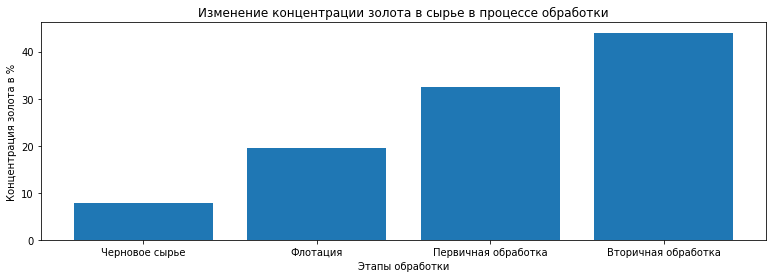

In [27]:
names_columns = ['Черновое сырье', 'Флотация', 'Первичная обработка',
                 'Вторичная обработка'] 
values_columns_au = [data_train['rougher.input.feed_au'].mean(),
                  data_train['rougher.output.concentrate_au'].mean(),
                data_train['primary_cleaner.output.concentrate_au'].mean(),
                  data_train['final.output.concentrate_au'].mean()]

plt.figure(figsize=(13, 4))
plt.bar(names_columns, values_columns_au)
plt.title('Изменение концентрации золота в сырье в процессе обработки')
plt.xlabel("Этапы обработки")
plt.ylabel("Концентрация золота в %")

Text(0, 0.5, 'Концентрация серебра в %')

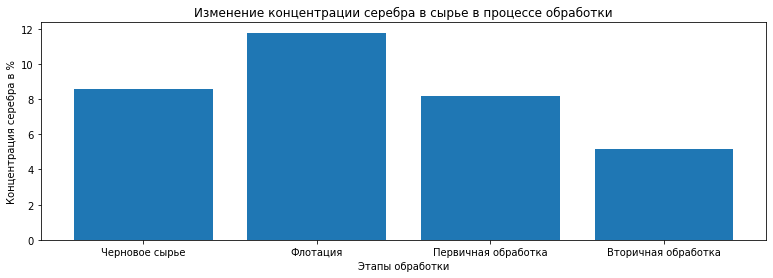

In [28]:
names_columns = ['Черновое сырье', 'Флотация', 'Первичная обработка',
                 'Вторичная обработка'] 
values_columns_ag = [data_train['rougher.input.feed_ag'].mean(),
                  data_train['rougher.output.concentrate_ag'].mean(),
                data_train['primary_cleaner.output.concentrate_ag'].mean(),
                  data_train['final.output.concentrate_ag'].mean()]

plt.figure(figsize=(13, 4))
plt.bar(names_columns, values_columns_ag)
plt.title('Изменение концентрации серебра в сырье в процессе обработки')
plt.xlabel("Этапы обработки")
plt.ylabel("Концентрация серебра в %")

Text(0, 0.5, 'Концентрация свинца в %')

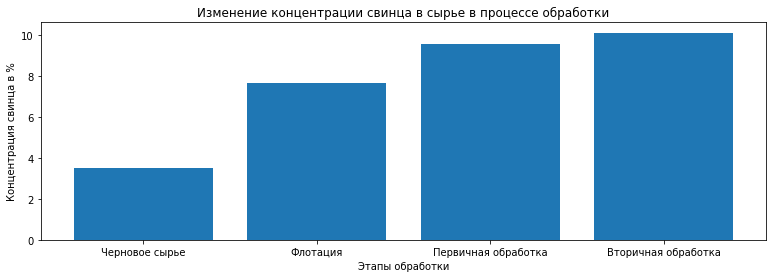

In [29]:
names_columns = ['Черновое сырье', 'Флотация', 'Первичная обработка',
                 'Вторичная обработка'] 
values_columns_pb = [data_train['rougher.input.feed_pb'].mean(),
                  data_train['rougher.output.concentrate_pb'].mean(),
                data_train['primary_cleaner.output.concentrate_pb'].mean(),
                  data_train['final.output.concentrate_pb'].mean()]

plt.figure(figsize=(13, 4))
plt.bar(names_columns, values_columns_pb)
plt.title('Изменение концентрации свинца в сырье в процессе обработки')
plt.xlabel("Этапы обработки")
plt.ylabel("Концентрация свинца в %")

На графиках мы видим, что после процесса флотации, концентрация всех металлов в сырье возрастает, а при первичной обработке и вторичной обработке концентрация золота и свинца растет еще выше, но концентрация серебра при этом уменьшается. Из этого можно сделать вывод что разные процессы по разному влияют на отчистку сырья, к примеру обработка помогает избавляться от примесей серебра, но в отчистке от свинца помогает слабо. Это может быть связано с множеством параметров сырья, поэтому чтобы быть уверенным в качестве модели нужно убедиться что в тестовой выборке сырье имеет аналогичные характеристики.

Теперь сравним распределение размеров гранул сырья в обучающей и тестовой выборках, если они будут разные - вполне вероятно что при флотации и обработке сырья будут получаться другие результаты и модель будет работать некорректно. 

In [30]:
data_train['rougher.input.feed_size'].describe()

count    14005.000000
mean        60.110518
std         22.418485
min          9.659576
25%         48.973027
50%         55.373885
75%         66.080172
max        484.967466
Name: rougher.input.feed_size, dtype: float64

In [31]:
data_test['rougher.input.feed_size'].describe()

count    5289.000000
mean       55.951097
std        19.081758
min         0.046369
25%        43.906347
50%        50.841029
75%        62.431047
max       392.494040
Name: rougher.input.feed_size, dtype: float64

На первый взгляд распределения размеров похожи, единственное в обучающей выборке нет такого аномального минимума. Давайте посмотрим на распределение в виде гистограммы и проверим с помощью бутстрепа.

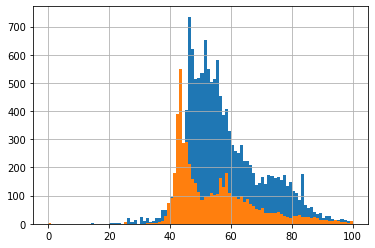

In [32]:
data_train['rougher.input.feed_size'].hist(bins = 100, range = (0, 100))
data_test['rougher.input.feed_size'].hist(bins = 100, range = (0, 100))

In [33]:
samples_train = pd.Series(data_train['rougher.input.feed_size'])
samples_test = pd.Series(data_test['rougher.input.feed_size'])
difference_mean = samples_train.mean() - samples_test.mean()
print("Разность средних размеров гранул:", difference_mean)  
state = np.random.RandomState(12345)
bootstrap_samples = 1000
values_train = []
values_test = []
for i in range(bootstrap_samples):
    subsample_train = samples_train.sample(n=200, replace=True, random_state=state)
    subsample_test = samples_test.sample(n=200, replace=True, random_state=state)
    values_train.append(subsample_train.mean())
    values_test.append(subsample_test.mean())
values_train = pd.Series(values_train)
values_test = pd.Series(values_test)
bootstrap_difference = values_train.mean() - values_test.mean()
print("Разность средних размеров гранул при использовании бутстрепа:", bootstrap_difference)

Разность средних размеров гранул: 4.159420603071474
Разность средних размеров гранул при использовании бутстрепа: 4.245366526856941


Исходя из графика и бутстрепа, мы видим что распределения похожи, несмотря на то что в тестовой выборке размеры гранул немного меньше.

Теперь давайте посмотрим какую часть при обработке в веществе суммарно занимают металлы.

In [34]:
analise_train = data_train.loc[:, ['rougher.input.feed_au', 'rougher.output.concentrate_au',
            'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au', 'rougher.input.feed_ag',
            'rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag',
            'rougher.input.feed_pb', 'rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb',
            'final.output.concentrate_pb',]]
analise_train['rougher_input_feed'] = analise_train['rougher.input.feed_au'] + analise_train['rougher.input.feed_ag'] + analise_train['rougher.input.feed_pb']
analise_train['rougher_output_concentrate'] = analise_train['rougher.output.concentrate_au'] + analise_train['rougher.output.concentrate_ag'] + analise_train['rougher.output.concentrate_pb']
analise_train['primary_cleaner_output_concentrate'] = analise_train['primary_cleaner.output.concentrate_au'] + analise_train['primary_cleaner.output.concentrate_ag'] + analise_train['primary_cleaner.output.concentrate_pb']
analise_train['final_output_concentrate'] = analise_train['final.output.concentrate_au'] + analise_train['final.output.concentrate_ag'] + analise_train['final.output.concentrate_pb']

Text(0, 0.5, 'Суммарная концентрация металов в %')

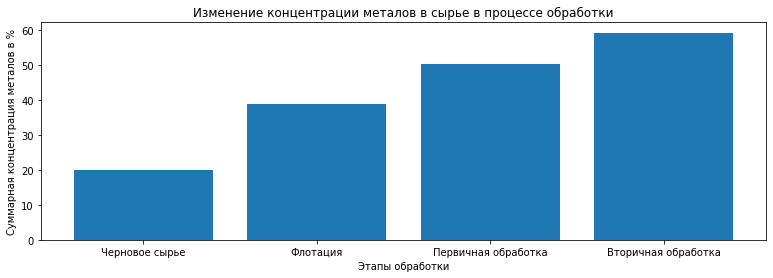

In [35]:
names_columns = ['Черновое сырье', 'Флотация', 'Первичная обработка',
                 'Вторичная обработка'] 
values_columns_sum = [analise_train['rougher_input_feed'].mean(),
                  analise_train['rougher_output_concentrate'].mean(),
                analise_train['primary_cleaner_output_concentrate'].mean(),
                  analise_train['final_output_concentrate'].mean()]

plt.figure(figsize=(13, 4))
plt.bar(names_columns, values_columns_sum)
plt.title('Изменение концентрации металов в сырье в процессе обработки')
plt.xlabel("Этапы обработки")
plt.ylabel("Суммарная концентрация металов в %")

Text(0, 0.5, 'Количество строк с таким процентом содержания')

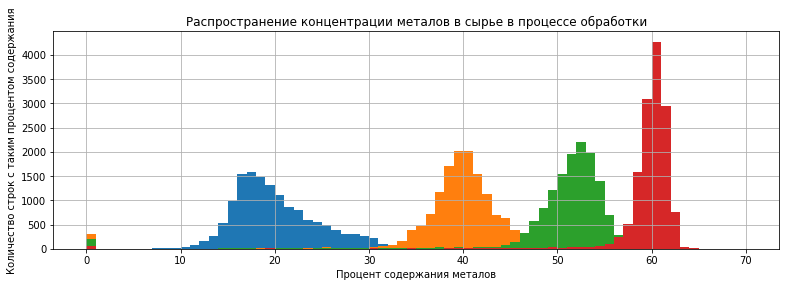

In [36]:
analise_train['rougher_input_feed'].hist(bins = 70, range = (0, 70), figsize=(13, 4))
analise_train['rougher_output_concentrate'].hist(bins = 70, range = (0, 70))
analise_train['primary_cleaner_output_concentrate'].hist(bins = 70, range = (0, 70))
analise_train['final_output_concentrate'].hist(bins = 70, range = (0, 70))
plt.title('Распространение концентрации металов в сырье в процессе обработки')
plt.xlabel("Процент содержания металов")
plt.ylabel("Количество строк с таким процентом содержания")

На гистограмме мы видим, что у нас есть такие аномалии где в руде нет металлов вообще, такого быть не может и значит нам необходимо избавиться от таких значений в обучающей выборке.

In [37]:
drop_zero_metal_df = analise_train.query('rougher_input_feed == 0 or primary_cleaner_output_concentrate == 0 or rougher_output_concentrate == 0 or final_output_concentrate == 0')
drop_zero_metal = pd.Series(drop_zero_metal_df.index)

0         19
1         22
2         30
3         45
4         46
       ...  
419    10330
420    10331
421    10332
422    10333
423    10334
Length: 424, dtype: int64

In [38]:
features_train_rougher = features_train_rougher.drop(index = drop_zero_metal)

,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_f_air
0,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,999.706909,-404.066986,1603.011353,-434.715027,1404.472046,1416.354980
1,6.161113,2.266033,525.290581,57.278666,35.753385,6.478583,11.971193,6.005766,11.996163,1000.286398,-400.065196,1600.754587,-449.953435,1399.227084,1399.719514
2,6.116455,2.159622,530.026610,57.510649,35.971630,6.362222,11.920603,6.197377,11.920305,999.719565,-400.074028,1599.337330,-450.008530,1399.180945,1400.316682
3,6.043309,2.037807,542.590390,57.792734,36.862241,6.118189,11.630094,6.203177,11.692450,999.814770,-400.200179,1600.059442,-450.619948,1400.943157,1400.234743
4,6.060915,1.786875,540.531893,56.047189,34.347666,5.663707,10.957755,6.198826,10.960521,999.678690,-399.752729,1600.208824,-449.599614,1401.560902,1401.160227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14144,6.091855,4.617558,560.889077,85.718304,37.369774,5.335862,7.762770,9.158609,7.766744,1199.245914,-300.845518,1149.807890,-498.789721,849.664935,849.758091
14145,6.121323,4.144989,559.031805,119.499241,38.591551,4.838619,7.356687,9.304952,7.095508,1196.569267,-299.512227,1147.675196,-500.608341,848.515225,850.013123
14146,5.970515,4.020002,555.682872,122.262690,40.074026,4.525061,6.586020,9.299606,6.584130,1204.866639,-299.235675,1149.942902,-501.717903,849.016017,850.455635
14147,6.048130,3.902537,544.731687,123.742430,39.713906,4.362781,6.210119,9.297709,6.209517,1201.904177,-299.907308,1154.087804,-500.036580,851.589767,851.345606


In [42]:
features_train_rougher = features_train_rougher.reset_index()
features_train_rougher = features_train_rougher.drop(['index'], axis = 1)
features_train_rougher.tail()

,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_f_air
0,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,999.706909,-404.066986,1603.011353,-434.715027,1404.472046,1416.354980
1,6.161113,2.266033,525.290581,57.278666,35.753385,6.478583,11.971193,6.005766,11.996163,1000.286398,-400.065196,1600.754587,-449.953435,1399.227084,1399.719514
2,6.116455,2.159622,530.026610,57.510649,35.971630,6.362222,11.920603,6.197377,11.920305,999.719565,-400.074028,1599.337330,-450.008530,1399.180945,1400.316682
3,6.043309,2.037807,542.590390,57.792734,36.862241,6.118189,11.630094,6.203177,11.692450,999.814770,-400.200179,1600.059442,-450.619948,1400.943157,1400.234743
4,6.060915,1.786875,540.531893,56.047189,34.347666,5.663707,10.957755,6.198826,10.960521,999.678690,-399.752729,1600.208824,-449.599614,1401.560902,1401.160227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13720,6.091855,4.617558,560.889077,85.718304,37.369774,5.335862,7.762770,9.158609,7.766744,1199.245914,-300.845518,1149.807890,-498.789721,849.664935,849.758091
13721,6.121323,4.144989,559.031805,119.499241,38.591551,4.838619,7.356687,9.304952,7.095508,1196.569267,-299.512227,1147.675196,-500.608341,848.515225,850.013123
13722,5.970515,4.020002,555.682872,122.262690,40.074026,4.525061,6.586020,9.299606,6.584130,1204.866639,-299.235675,1149.942902,-501.717903,849.016017,850.455635
13723,6.048130,3.902537,544.731687,123.742430,39.713906,4.362781,6.210119,9.297709,6.209517,1201.904177,-299.907308,1154.087804,-500.036580,851.589767,851.345606


In [43]:
features_train_final = features_train_final.drop(index = drop_zero_metal).reset_index()
features_train_final = features_train_final.drop(['index'], axis = 1)
features_train_final.tail()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,...,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery
13720,123.381787,8.028927,6.5,1.304232,1648.421193,-400.382169,1648.833984,-399.669220,35.043205,-499.045671,...,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428,89.574376
13721,120.878188,7.962636,6.5,1.302419,1649.820162,-399.930973,1649.725133,-400.636306,35.026062,-499.891945,...,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608,87.724007
13722,105.666118,7.955111,6.5,1.315926,1649.166761,-399.888631,1649.772714,-399.831902,35.003586,-501.083794,...,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452,88.890579
13723,98.880538,7.984164,6.5,1.241969,1646.547763,-398.977083,1651.498591,-399.745329,34.980742,-498.131002,...,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471,89.858126
13724,95.248427,8.078957,6.5,1.283045,1648.759906,-399.862053,1649.464582,-400.673303,34.940919,-500.150510,...,-500.492702,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575,89.514960


Итого мы видим что в процессе обработки содержание металлов в сырье увеличивается с 20% до 60%, из которых 40% составляет золото, значит в процессе флотации и обработки мы избавляемся как минимум от 2/3 изначального объема сырья, который уходит в хвосты, либо если смотреть относительно содержания золота, его концентрация увеличивается в 4 раза, а значит в процессе отчистки уходят и другие металлы, а от изначального объема сырья остается не более 25%. Также мы нашли и избавились от аномалий где в сырье нет металлов.

Перейдем к обучению предсказательной модели.

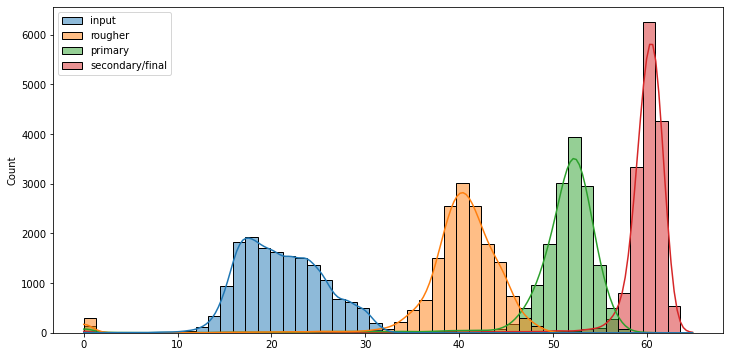

## Модель

Начнем с того что напишем функции для определения новой метрики качества sMAPE по одной переменной и по двум.

In [44]:
def smape(target_1, predictions):
    a = abs(target_1 - predictions)
    b = (abs(target_1) + abs(predictions)) / 2
    errors = a/b
    return errors.sum()/errors.shape[0] * 100

In [45]:
def total_smape(smape_1, smape_2):
    total_smape = 0.25 * smape_1 + 0.75 * smape_2
    return(total_smape)

Функции написаны, теперь нужно выделить целевые параметры для обучения модели. И выбрать лучшую модель с помощью кросс-валидации.

In [64]:
target_train_rougher = data_train['rougher.output.recovery']
target_train_rougher = target_train_rougher.drop(index = drop_zero_metal).reset_index()
target_train_rougher = target_train_rougher['rougher.output.recovery']
target_train_final = data_train['final.output.recovery']
target_train_final = target_train_final.drop(index = drop_zero_metal).reset_index()
target_train_final = target_train_final['final.output.recovery']

In [65]:
best_result_1 = 100
best_depth_1 = 0
my_scorer = make_scorer(smape, greater_is_better = False)
for depth_1 in range(1, 50):
    model_1 = DecisionTreeRegressor(random_state = 12345, max_depth = depth_1)
    scores_1 = cross_val_score(model_1, features_train_rougher, target_train_rougher, scoring=my_scorer, cv = 4)
    result_1 = abs(scores_1.mean())
    if result_1 < best_result_1:
        best_model_1 = model_1
        best_result_1 = result_1
        best_depth_1 = depth_1

print("Средняя оценка качества модели методом кросс-валидации:", best_result_1, "Глубина дерева:", best_depth_1)

Средняя оценка качества модели методом кросс-валидации: 7.784412668119773 Глубина дерева: 2


In [66]:
best_model_rougher = None
best_result_2 = 100
best_est = 0
best_depth_2 = 0
for est in range(10, 51, 10):
    for depth_2 in range (1, 17, 2):
        model_2 = RandomForestRegressor(random_state = 12345, n_estimators = est, max_depth = depth_2)
        scores_2 = cross_val_score(model_2, features_train_rougher, target_train_rougher, scoring=my_scorer, cv = 4)
        result_2 = abs(scores_2.mean())
        if best_result_2 > result_2:
            best_model_rougher = model_2
            best_result_2 = result_2
            best_est = est
            best_depth_2 = depth_2
print("Высшая точность:", best_result_2, "Количество деревьев:", best_est, "Максимальная глубина:", depth_2)

Высшая точность: 7.516790580769591 Количество деревьев: 10 Максимальная глубина: 15


In [67]:
model_3 = LinearRegression()
abs(np.mean(cross_val_score(model_3, features_train_rougher, target_train_rougher, scoring=my_scorer, cv = 4)))

6.927255381645593

In [68]:
best_result_4 = 100
best_depth_4 = 0
for depth_4 in range(1, 50):
    model_4 = DecisionTreeRegressor(random_state = 12345, max_depth = depth_4)
    scores_4 = cross_val_score(model_4, features_train_final, target_train_final, scoring=my_scorer, cv = 4)
    result_4 = abs(scores_4.mean())
    if result_4 < best_result_4:
        best_model_4 = model_4
        best_result_4 = result_4
        best_depth_4 = depth_4

print("Средняя оценка качества модели методом кросс-валидации:", best_result_1, "Глубина дерева:", best_depth_1)

Средняя оценка качества модели методом кросс-валидации: 7.784412668119773 Глубина дерева: 2


In [69]:
best_model_final = None
best_result_5 = 100
best_est_5 = 0
best_depth_5 = 0
for est in range(10, 51, 10):
    for depth_5 in range (1, 17, 2):
        model_5 = RandomForestRegressor(random_state = 12345, n_estimators = est, max_depth = depth_5)
        scores_5 = cross_val_score(model_5, features_train_final, target_train_final, scoring=my_scorer, cv = 4)
        result_5 = abs(scores_5.mean())
        if best_result_5 > result_5:
            best_model_final = model_5
            best_result_5 = result_5
            best_est_5 = est
            best_depth_5 = depth_5
print("Высшая точность:", best_result_5, "Количество деревьев:", best_est_5, "Максимальная глубина:", depth_5)

Высшая точность: 8.23574212244129 Количество деревьев: 20 Максимальная глубина: 15


In [85]:
model_6 = LinearRegression()
abs(np.mean(cross_val_score(model_6, features_train_final, target_train_final, scoring=my_scorer, cv = 4)))

8.741289565079455

Мы нашли модели с лучшими параметрами, теперь давайте применим их на тестовой выборке и оценим с помощью метрики sMAPE.

In [71]:
data_test_rougher = data_test.loc[:, ['rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_rate',
    'rougher.input.feed_size', 'rougher.input.feed_sol', 'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
    'rougher.input.floatbank10_xanthate', 'rougher.input.floatbank11_sulfate', 'rougher.input.floatbank11_xanthate',
    'rougher.state.floatbank10_a_air', 'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_b_air',
    'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_c_air', 'rougher.state.floatbank10_c_level',
    'rougher.state.floatbank10_d_air', 'rougher.state.floatbank10_d_level', 'rougher.state.floatbank10_e_air',
    'rougher.state.floatbank10_e_level', 'rougher.state.floatbank10_f_air', 'rougher.state.floatbank10_f_level']]
data_test_rougher = data_test_rougher.drop(['rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_c_air',
        'rougher.state.floatbank10_d_air', 'rougher.state.floatbank10_f_level', 'rougher.state.floatbank10_c_level',
    'rougher.state.floatbank10_d_level', 'rougher.state.floatbank10_e_level', 'rougher.state.floatbank10_f_level'], axis = 1)
features_test_rougher = data_test_rougher.ffill(axis = 0)

In [86]:
#model_rougher = RandomForestRegressor(random_state = 12345, n_estimators = 10, max_depth = 15)
model_rougher = LinearRegression()
model_rougher.fit(features_train_rougher, target_train_rougher)
rougher_output_recovery_test = model_rougher.predict(features_test_rougher)
rougher_output_recovery_test

array([93.24355318, 92.34083652, 92.69430258, ..., 95.6538445 ,
       95.58702068, 94.34023749])

In [87]:
data_test_final = data_test.loc[:, ['primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
    'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate', 'primary_cleaner.state.floatbank8_a_air',
    'primary_cleaner.state.floatbank8_a_level', 'primary_cleaner.state.floatbank8_b_air',
    'primary_cleaner.state.floatbank8_b_level', 'primary_cleaner.state.floatbank8_c_air',
    'primary_cleaner.state.floatbank8_c_level', 'primary_cleaner.state.floatbank8_d_air',
    'primary_cleaner.state.floatbank8_d_level', 'secondary_cleaner.state.floatbank2_a_air', 
    'secondary_cleaner.state.floatbank2_a_level', 'secondary_cleaner.state.floatbank2_b_air',
    'secondary_cleaner.state.floatbank2_b_level', 'secondary_cleaner.state.floatbank3_a_air',
    'secondary_cleaner.state.floatbank3_a_level', 'secondary_cleaner.state.floatbank3_b_air', 
    'secondary_cleaner.state.floatbank3_b_level', 'secondary_cleaner.state.floatbank4_a_air',
    'secondary_cleaner.state.floatbank4_a_level', 'secondary_cleaner.state.floatbank4_b_air',
    'secondary_cleaner.state.floatbank4_b_level', 'secondary_cleaner.state.floatbank5_a_air', 
    'secondary_cleaner.state.floatbank5_a_level', 'secondary_cleaner.state.floatbank5_b_air',
    'secondary_cleaner.state.floatbank5_b_level', 'secondary_cleaner.state.floatbank6_a_air',
    'secondary_cleaner.state.floatbank6_a_level']]
data_test_final = data_test_final.drop(['primary_cleaner.state.floatbank8_b_air', 'primary_cleaner.state.floatbank8_c_air',
            'primary_cleaner.state.floatbank8_b_level', 'primary_cleaner.state.floatbank8_c_level'],  axis = 1)
features_test_final = data_test_final.ffill(axis = 0)
features_test_final['rougher.output.recovery'] = rougher_output_recovery_test
features_test_final.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,...,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery
0,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.001695,-499.485144,24.938200,-500.490963,...,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414,93.243553
1,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1399.508091,-500.416324,24.923466,-499.813963,...,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438,92.340837
2,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1399.497088,-499.715479,24.908732,-500.304035,...,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559,92.694303
3,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1401.065165,-501.038738,24.893998,-499.382374,...,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987,91.580689
4,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1399.480508,-499.374053,24.886905,-499.357375,...,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333,89.824979


In [92]:
#model_final = RandomForestRegressor(random_state = 12345, n_estimators = 20, max_depth = 15)
model_final = DecisionTreeRegressor(random_state = 12345, max_depth = 2)
model_final.fit(features_train_final, target_train_final)
final_output_recovery_test = model_final.predict(features_test_final)
final_output_recovery_test

array([72.57178177, 72.57178177, 72.57178177, ..., 72.57178177,
       72.57178177, 72.57178177])

А теперь необходимо достать данные по целевым признакам из выборки data_full для оценки предсказания на тестовой выборке.

In [93]:
data_test_targets = data_test.loc[:, ['date']]
data_test_targets = data_test_targets.merge(data_full, on='date', how='left')
target_rougher_test = data_test_targets['rougher.output.recovery']
target_final_test = data_test_targets['final.output.recovery']

In [94]:
smape_1 = smape(target_rougher_test, rougher_output_recovery_test)
print('sMAPE предсказания первого целевого признака rougher.output.recovery равен:', smape_1)
smape_2 = smape(target_final_test, final_output_recovery_test)
print('sMAPE предсказания второго целевого признака final.output.recovery равен:', smape_2)
total_smape_test = total_smape(smape_1, smape_2)
print('Итоговвое sMAPE равно:', total_smape_test)

sMAPE предсказания первого целевого признака rougher.output.recovery равен: 8.180815142935222
sMAPE предсказания второго целевого признака final.output.recovery равен: 10.051449658219887
Итоговвое sMAPE равно: 9.583791029398721


А теперь чтобы оценить адекватность модели сравним результат с константной моделью.

In [95]:
dummy_regressor_rougher = DummyRegressor(strategy = 'median')
dummy_regressor_rougher.fit(features_train_rougher, target_train_rougher)
dummy_regressor_rougher_predict = dummy_regressor_rougher.predict(features_test_rougher)
smape_dummy_1 = smape(target_rougher_test, dummy_regressor_rougher_predict)
print('sMAPE предсказания константной модели rougher.output.recovery равен:', smape_dummy_1)
dummy_regressor_final = DummyRegressor(strategy = 'median')
dummy_regressor_final.fit(features_train_final, target_train_final)
dummy_regressor_final_predict = dummy_regressor_final.predict(features_test_final)
smape_dummy_2 = smape(target_final_test, dummy_regressor_final_predict)
print('sMAPE предсказания константной модели final.output.recovery равен:', smape_dummy_2)
total_smape_dummy = total_smape(smape_dummy_1, smape_dummy_2)
print('Итоговвое sMAPE константной модели равно:', total_smape_dummy)

sMAPE предсказания константной модели rougher.output.recovery равен: 8.524314629416791
sMAPE предсказания константной модели final.output.recovery равен: 9.747335701897052
Итоговвое sMAPE константной модели равно: 9.441580433776988


### Вывод:

Мы обучили модели с параметрами обеспечивающими самую высокую точность, и проверка на тестовой выборке показала что наши модели могут делать достаточно точные предсказания с погрешностью порядка 9,6 % согласно итоговой метрике sMAPE. Однако это все равно чуть меньше чем константная модель.

## Вывод:

Данные которые нам предоставил заказчик были исследованы, был выбран подход обучения моделей отдельно по процессам обработки, обучены две модели с оптимальными параметрами которые были подобраны с помощью кросс валидации, и в итоге наши модели показали на тестовой выборке возможность предсказывать эффективность обогащения с погрешностью 9,6%. Проверку на адекватность модель не прошла - у константной модели согласно выбранной метрике показатели лучше. На мой взгляд в такой ситуации необходимо сообщить результат заказчику, и сделать запрос возможно ли как то изменить или дополнить исходные данные, для обучения более точной модели. 